### Multi-Arm Bandit
---
**Upper-Confidence-Bound**
<img style="float:left" src="UCB1.png" alt="drawing" width="300"/>

where ln t denotes the natural logarithm of t (the number that e = 2.71828 would have to be raised to in order to equal t), Nt(a) denotes the number of times that action a has been selected prior to time t (the denominator in (2.1)), and the number c > 0 controls the degree of exploration. If Nt(a) = 0, then a is considered to be a maximizing action.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
class Bandit:
    def __init__(self, k=10, exp_rate=.3, lr=0.1):
        self.k = k
        self.actions = range(self.k)
        self.exp_rate = exp_rate
        self.lr = lr
        self.total_reward = 0
        self.avg_reward = []
        
        self.TrueValue = []
        for i in range(self.k):
            self.TrueValue.append(np.random.randn())  # standard normal distribution
        
        self.values = np.zeros(self.k)
        self.times = 0
        self.action_times = np.zeros(self.k)
    
    def chooseAction(self):
        # explore
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # exploit
            action = np.argmax(self.values)
        return action
    
    def takeAction(self, action):
        self.times += 1
        self.action_times[action] += 1
        # take action and update value estimates
        # reward = self.TrueValue[action]
        reward = np.random.randn() + self.TrueValue[action]  # add randomness to reward
        # using incremental method to propagate
        self.values[action] += self.lr * (reward - self.values[action])  # look like fixed lr converges better
        
        self.total_reward += reward
        self.avg_reward.append(self.total_reward/self.times)
        
    def play(self, n):
        for _ in range(n):
            action = self.chooseAction()
            self.takeAction(action)

In [18]:
bdt = Bandit(k=5)
bdt.play(2000)

In [19]:
print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

Estimated values [ 1.46741839 -0.03175273  1.16176119  1.03419784 -0.7886088 ]
Actual values [1.776884241136464, -0.03272624662440113, 1.4013505997714082, 1.1854466681816254, -0.5722397490207137]


In [20]:
bdt.action_times

array([1445.,  120.,  189.,  140.,  106.])

Text(0,0.5,'avg reward')

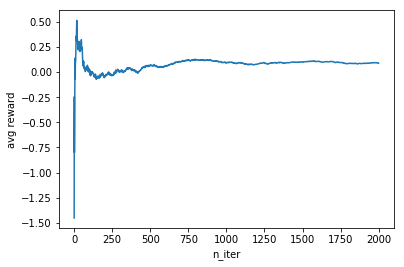

In [5]:
plt.plot(bdt.avg_reward)
plt.xlabel("n_iter")
plt.ylabel("avg reward")